# Barrel of Oil vs Share of Exxon Mobile Stock Problem

## The question at hand:

**Doses the barrel of oil do a good job at predicting the share of Exxon Mobile stock?**


To answer this questions we're goint to use a Linear Regression Model(LRM), becouse of this reasons: 
1. We want to no the relationship between the two varaibles. 
2. We want to no the correlation between the varaibles (r2).
3. It will be a useful to have an equation to make prediction in the future. 

The equation of the LRM is:

$ y = \beta_0 + \beta_1x $

- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coeficient for x


# Importing libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

# Loading the Data

In [27]:
price = pd.read_excel('data/oil_exxon.xlsx')

In [28]:
price.head()

,date,exon_price,oil_price
0,2014-03-28,97.699997,106.64
1,2014-03-31,97.680000,105.95
2,2014-04-01,97.730003,105.70
3,2014-04-02,97.949997,103.37
4,2014-04-03,97.930000,104.88


Now we are going to make some change to organize the price dataframe

In [29]:
price.index

RangeIndex(start=0, stop=1256, step=1)

In [30]:
pd.to_datetime(price['date'])

0      2014-03-28
1      2014-03-31
2      2014-04-01
3      2014-04-02
4      2014-04-03
          ...    
1251   2019-03-19
1252   2019-03-20
1253   2019-03-21
1254   2019-03-22
1255   2019-03-25
Name: date, Length: 1256, dtype: datetime64[ns]

In [31]:
price.index = pd.to_datetime(price['date'])

In [32]:
price.head()

,date,exon_price,oil_price
date,,,
2014-03-28,2014-03-28,97.699997,106.64
2014-03-31,2014-03-31,97.680000,105.95
2014-04-01,2014-04-01,97.730003,105.70
2014-04-02,2014-04-02,97.949997,103.37
2014-04-03,2014-04-03,97.930000,104.88


# Cleaning the data

Steps to clean the data:
> 1. Check the data types, to be sure they are correct. 
> 2. Make sure the column names are correct.
> 3. Check for and drop/fill missing values.

Now we'are gone create a dictionary object where the old name is the key, and the new name is the value for that key.

In [33]:
# define the new name.
new_columns = {'exon_price': 'exxon_price'}

# rename the column
price = price.rename(columns = new_columns)
price.head()

,date,exxon_price,oil_price
date,,,
2014-03-28,2014-03-28,97.699997,106.64
2014-03-31,2014-03-31,97.680000,105.95
2014-04-01,2014-04-01,97.730003,105.70
2014-04-02,2014-04-02,97.949997,103.37
2014-04-03,2014-04-03,97.930000,104.88


In [34]:
# Dropint the duplicate data column
price.drop('date', axis=1, inplace=True)

In [35]:
price

,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88
...,...,...
2019-03-19,80.870003,67.13
2019-03-20,81.320000,68.35
2019-03-21,81.790001,68.30


Now we're goin to look if we have missing values in our data set

In [39]:
price.isna().head()

,exxon_price,oil_price
date,,
2014-03-28,False,False
2014-03-31,False,False
2014-04-01,False,False
2014-04-02,False,False
2014-04-03,False,False


In [40]:
price.isna().any()

exxon_price    False
oil_price       True
dtype: bool

In [41]:
price.isna().sum()

exxon_price    0
oil_price      8
dtype: int64

Now we're going to drop the missing values and make sure every missing values has been removed.

In [42]:
price = price.dropna()

In [44]:
price.isna().sum()

exxon_price    0
oil_price      0
dtype: int64

# Exploring the Data

The exploration fase will help us to figure out:
    
1. How the data is distributed
2. If there is a relationship wtween the to variables
3. If we have outliers
4. If the data is skewed

**Scatter Plot**

In [49]:
price.columns

Index(['exxon_price', 'oil_price'], dtype='object')

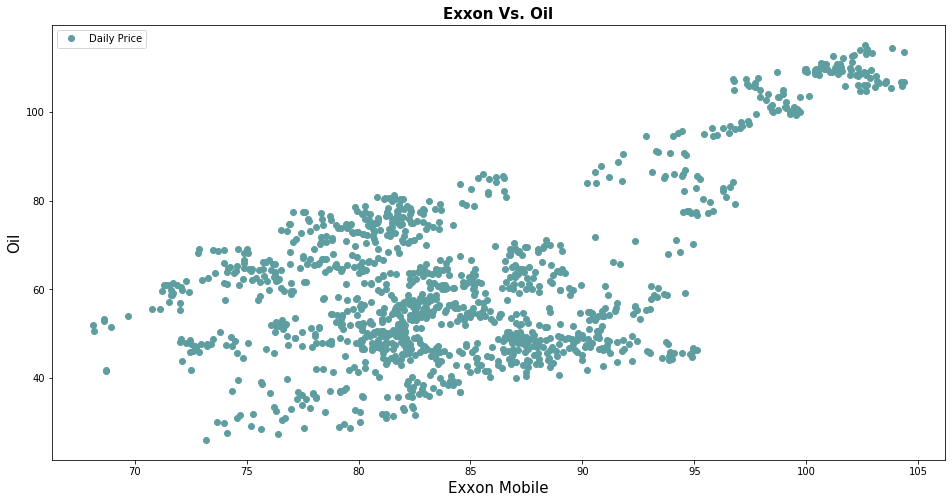

In [50]:
# Defining the x and y data.
x = price['exxon_price']
y = price['oil_price']

# Plot creation
fig, ax = plt.subplots(figsize=(16,8))

# Ploting the data
ax.plot(x, y, 'o', color='cadetblue', label='Daily Price' )

# Customizing
ax.set_title('Exxon Vs. Oil', fontsize=15, fontweight='bold')
ax.set_xlabel('Exxon Mobile', fontsize=15)
ax.set_ylabel('Oil', fontsize=15)
ax.legend()


**Measuring the Correlation**

In [52]:
# let's measure that correlation
price.corr()

,exxon_price,oil_price
exxon_price,1.00000,0.60132
oil_price,0.60132,1.00000


This is the criteria to mesure a correlation:
- Very strong relationship ( $|r|$ > 0.8 $\geq$ )
- Strong relationship ( 0.6 $ \leq |r|$ )
- Moderate relationship ( 0.4 $ \leq |r|$ )
- Weak relationship ( 0.2 $ \leq |r|$ )
- Very weak relationship ( $ |r|$ )